'''Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns = feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns = ["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

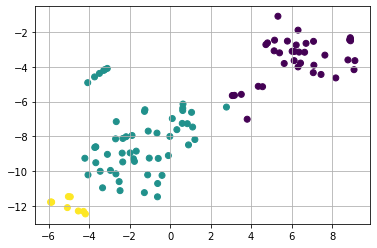

In [3]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_test = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.grid(True)
plt.show()

In [7]:
print('Первый кластер: ', 'Mean price - ', np.array(y_test[labels_test == 0]).mean(), '\n', 'Mean CRIM - ', X_test['CRIM'][labels_test == 0].mean(), '\n')
print('Второй кластер:', 'Mean price - ', np.array(y_test[labels_test == 1]).mean(), '\n', 'Mean CRIM - ', X_test['CRIM'][labels_test == 1].mean(), '\n')
print('Третий кластер:', 'Mean price - ', np.array(y_test[labels_test == 2]).mean(), '\n', 'Mean CRIM - ', X_test['CRIM'][labels_test == 2].mean(), '\n')

Первый кластер:  Mean price -  16.710526315789473 
 Mean CRIM -  9.419181842105264 

Второй кластер: Mean price -  22.690909090909095 
 Mean CRIM -  0.21929690909090907 

Третий кластер: Mean price -  34.3111111111111 
 Mean CRIM -  0.04070333333333334 

